In [2]:
from pandas import read_csv
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Solving_forest = make_pipeline(
#     StandardScaler(),
#     LogisticRegression(C=2, max_iter=400),
# )
Solving_forest = BaggingClassifier()
data = read_csv('train.csv')
print(data.shape)
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75)
print(X_test.shape, y_test.shape)
Solving_forest.fit(X_train, y_train)
roc_auc_score(y_test, Solving_forest.predict_proba(X_test), multi_class='ovo', )
%store Solving_forest

(42000, 785)
(10500, 784) (10500,)


'store' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
%store -r  Solving_forest

[0]


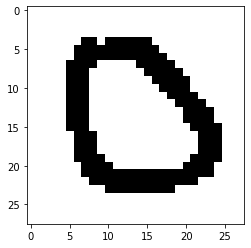

In [37]:
from random import randint
import matplotlib.pyplot as plt
from numpy import reshape
from pandas import read_csv
given_num = randint(0, data.__len__() - 1)
X_ist = data.iloc[given_num:(given_num + 1) % len(data), 1:].copy()
X = X_ist.iloc[0].to_numpy().copy()
X = X != 0
X = X.astype('int')
X = list(map(lambda x: (255*(1-x),)*3, X))
X = reshape(X, (28,28,3))
imgplot = plt.imshow(X)
# X = reshape(X, (28,28))
# for i in X:
#     print(''.join(i.astype('int').astype('str')))
print(Solving_forest.predict(X_ist))
